In [1]:
cd ..

/Users/AchilleTalon/Documents/GitHub/picarro_calculator/picarro-calculator


In [2]:
import Picarro as pica

In [3]:
X = pica.Isotope("example_data/HKDS2009_IsoWater_20191010_094459.csv")

In [4]:
X.readRaw()
X.checkEmpty()
X.checkVolume()

No empty cells. Proceeding...


In [16]:
X.runSummary()
X.summary.head()

Line  H2O_Mean  Good  Error Code  \
Identifier 1 Identifier 2 Inj Nr                                     
GNS-02       TR           1         45     24583     0           2   
                          2         46     23870     0           2   
                          3         47     24363     0           2   
                          4         48     19862     1           0   
GNS-03       TR           1         49     19113     1           0   

                                  d(18_16)Mean  d(D_H)Mean  
Identifier 1 Identifier 2 Inj Nr                            
GNS-02       TR           1            -13.741     -68.747  
                          2            -14.684     -77.268  
                          3            -14.587     -78.378  
                          4            -14.484     -77.234  
GNS-03       TR           1            -14.379     -76.967

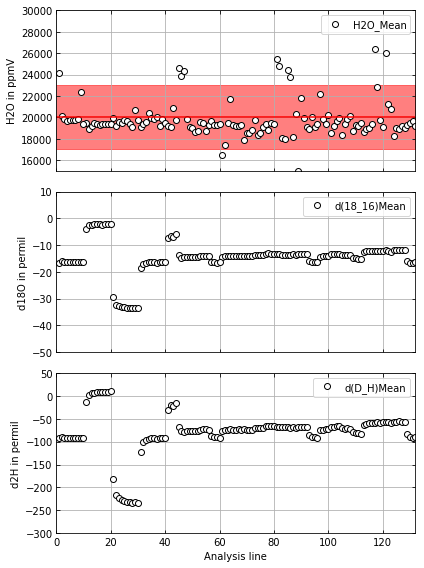

In [17]:
X.plotSummary()

In [18]:
X.IsotopeSelect("O")

In [19]:
X.initMemCoeffs()
X.coeffs

{1: 0.8490295,
 2: 0.86461,
 3: 0.8804764,
 4: 0.896634,
 5: 0.913088,
 6: 0.9298441,
 7: 0.9469076,
 8: 0.9642842,
 9: 0.9819797,
 10: 1.0}

In [20]:
X.Optimize("O")

Now running the Optimization algorithm to minimize the combined standard deviation


In [21]:
X.MemoryCorrection("O")

Successfully corrected values for memory effects


Plotting the results of memory correction


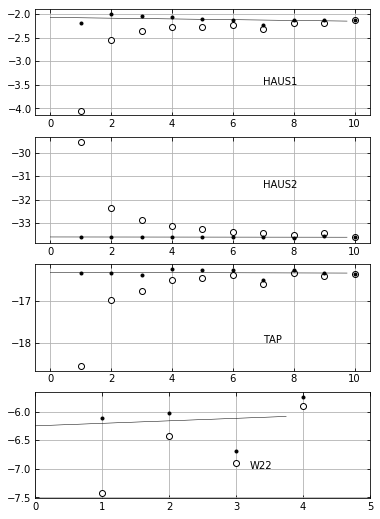

In [22]:
X.memCorrPlot("O")

Successfully corrected for drift


/Users/AchilleTalon/Documents/GitHub/picarro_calculator/picarro-calculator/Picarro.py:377: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.drift[col2] = results


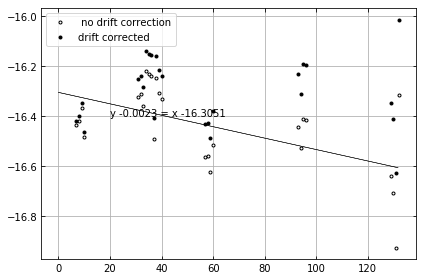

In [23]:
X.driftCorrect()
X.driftCorrPlot("O")

Sucessfully calibrated to VSMOW scale


/Users/AchilleTalon/Documents/GitHub/picarro_calculator/picarro-calculator/Picarro.py:484: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.vsmow[col1] = results


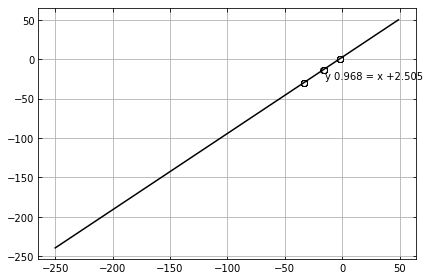

In [24]:
X.VSMOWcorrect()
X.VSMOWCorrPlot()

In [25]:
X.getMeanSDs()

In [26]:
X.run_overview.head()

,Identifier 1,Identifier 2,d18O_raw,stdev. raw,d18O memory,stdev. memory,d18O drift,stdev. drift,d18O vsmow,d18O stdev. vsmow,d18O counts
0,GNS-02,TR,-14.484000,NaN,-14.617534,NaN,-14.508112,NaN,-11.541143,NaN,1
1,GNS-03,TR,-14.348500,0.023445,-14.341824,0.017806,-14.226704,0.020726,-11.268694,0.020066,4
2,GNS-04,TR,-14.006000,0.005292,-13.987580,0.025480,-13.863341,0.022945,-10.916900,0.022214,4
3,GNS-05,TR,-14.089333,0.086396,-14.027713,0.059225,-13.884097,0.061491,-10.936994,0.059533,3
4,GNS-06,TR,-14.080750,0.052829,-14.084616,0.054709,-13.933021,0.055754,-10.984362,0.053979,4
